In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

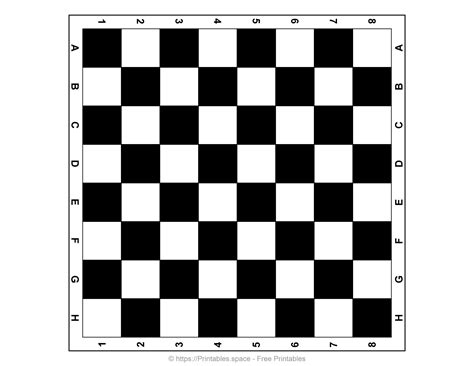

In [ ]:
image = cv2.imread("/content/Chess.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

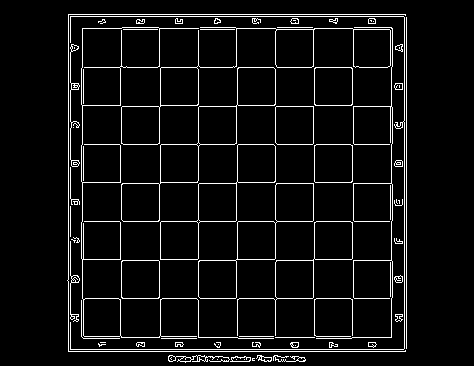

In [ ]:
edges = cv2.Canny(gray, 50, 150)
cv2_imshow(edges)

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=200, minLineLength=150, maxLineGap=30)
image_lines = image.copy()

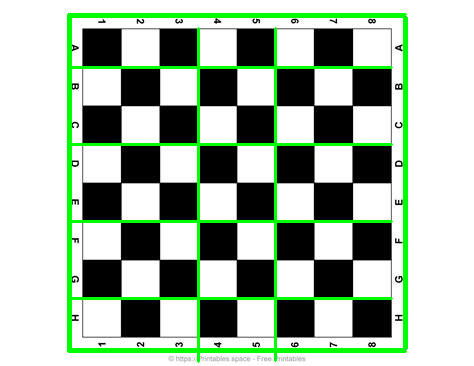

In [ ]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2_imshow(image_lines)

•	T1.2 Region-based segmentation
o	Regions based (group pixels) on criteria like color, texture, or intensity.


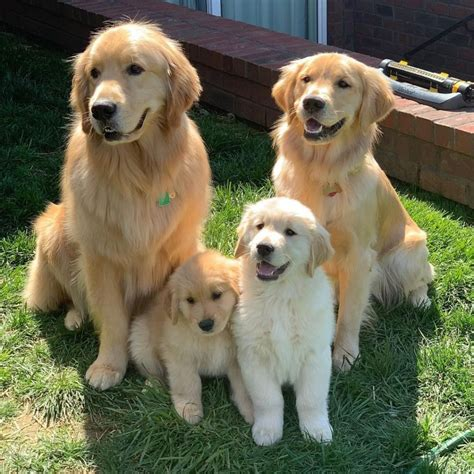

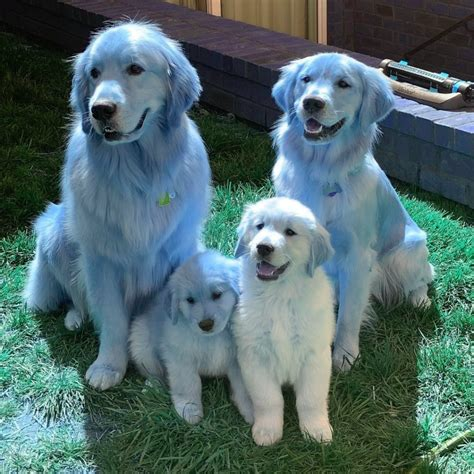

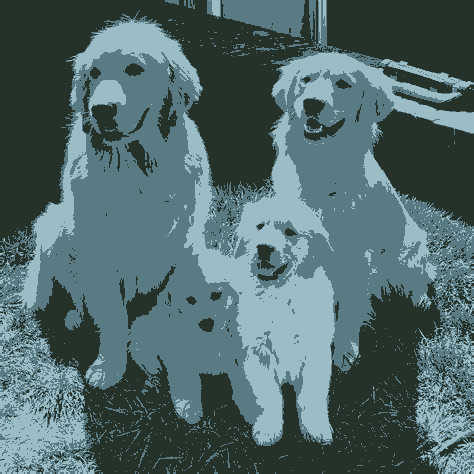

In [ ]:
image = cv2.imread("/content/Golden.png")
cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

pixels = image.reshape((-1, 3)).astype(np.float32)

K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

segmented = centers[labels.flatten()].reshape(image.shape)
segmented = np.uint8(segmented)

cv2_imshow(segmented)

•	T1.3 Hough transform to detect specific shapes like lines and circles within an image.
o	Hough Transform is a feature extraction technique can identify geometric shapes in images by converting them into a mathematical representation in parameter space.
o	Hough Transform is primarily used to detect straight lines.
o	Hough Transform can be used to detect circular objects within an image.


In [ ]:
image = cv2.imread("/content/Coin.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

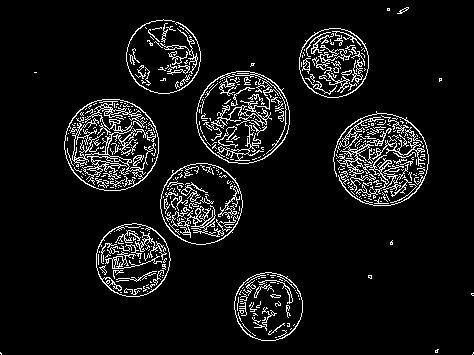

In [ ]:
edges = cv2.Canny(gray, 50, 150)
cv2_imshow(edges)

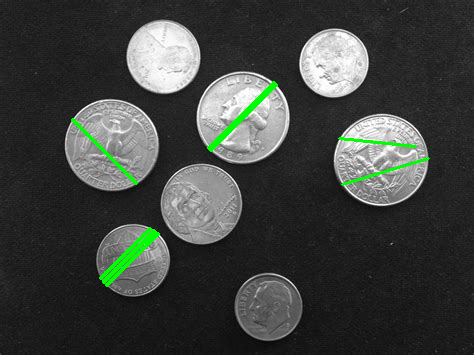

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=5)
image_lines = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image_lines)

In [ ]:
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=150,
    param2=100,
    minRadius=30,
    maxRadius=100
)

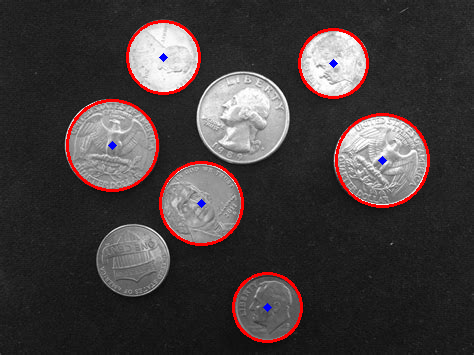

In [ ]:
image_circles = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image_circles, (i[0], i[1]), i[2], (0, 0, 255), 2)
        cv2.circle(image_circles, (i[0], i[1]), 2, (255, 0, 0), 3)

cv2_imshow(image_circles)

Task-2:- Object Detection using following techniques.
•	T2.1 YOLO (You Only Look Once)
o	YOLO is a variant of a Convolutional Neural Network (CNN) as it utilizes a single CNN architecture to perform real-time object detection by predicting bounding boxes and class probabilities.
Key Steps:-
1.	Step 1: Setup the Environment :     pip install opencv-python
					pip install ultralytics
					import cv2
					from ultralytics import YOLO
2.	Step 2: Load YOLO : yolo = YOLO('yolo.pt') .
3.	Optional :- %%load any variant of YOLO for fast convergence.
1.	Fashion MNIST dataset (The dataset of 70,000 28x28 labeled fashion images)
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
2.	CIFAR-100 dataset
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).


In [3]:
import torch
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from ultralytics import YOLO

transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Resize((128, 128))  
])

train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)


def convert_to_yolo_format(image, label):
    """
    Convert Fashion MNIST images into YOLO label format.
    YOLO expects [class, x_center, y_center, width, height].
    """
    height, width = image.shape
    
    x_center = width / 2
    y_center = height / 2
    w = width
    h = height
    
    return f"{label} {x_center/width} {y_center/height} {w/width} {h/height}"


data_path = "fashion_mnist_yolo"
os.makedirs(f"{data_path}/images/train", exist_ok=True)
os.makedirs(f"{data_path}/labels/train", exist_ok=True)


for i in range(5000):
    img, label = train_data[i]
    img = (img.squeeze().numpy() * 255).astype(np.uint8) 
    img_path = f"{data_path}/images/train/{i}.jpg"
    cv2.imwrite(img_path, img)
    
    label_path = f"{data_path}/labels/train/{i}.txt"
    with open(label_path, "w") as f:
        f.write(convert_to_yolo_format(img, label))


model = YOLO("yolov8n.yaml")  
model.train(data="fashion_mnist.yaml", epochs=5, imgsz=128)


test_img, _ = test_data[0]
test_img = (test_img.squeeze().numpy() * 255).astype(np.uint8)
cv2.imwrite("test_fashion.jpg", test_img)

results = model("test_fashion.jpg") 


plt.imshow(test_img, cmap="gray")
plt.title("YOLO Detection")
plt.show()


Ultralytics 8.3.78  Python-3.10.10 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=fashion_mnist.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\fashion_mnist_yolo\labels\train... 50


train: New cache created: D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\fashion_mnist_yolo\labels\train.cache


val: Scanning D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\fashion_mnist_yolo\labels\train.cache..


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      3.406      4.202      3.756         24        128: 100%|██████████| 313/313 [01:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000     0.0656      0.167     0.0659      0.024

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.674      2.154      2.172         25        128: 100%|██████████| 313/313 [01:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000      0.135      0.417      0.199      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.089      1.709       1.64         24        128: 100%|██████████| 313/313 [02:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000      0.138      0.323      0.224      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.8883      1.564      1.448         28        128: 100%|██████████| 313/313 [01:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000      0.193      0.427      0.297      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.7673      1.484      1.358         28        128: 100%|██████████| 313/313 [02:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000      0.228      0.491      0.303      0.144

5 epochs completed in 0.223 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.78  Python-3.10.10 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
YOLOv8n summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000      0.228       0.49      0.303      0.144
               T-shirt        457        457      0.113      0.166     0.0944     0.0446
               Trouser        556        556      0.243      0.903      0.726      0.309
              Pullover        504        504      0.161      0.863      0.241      0.152
                 Dress        501        501      0.348      0.443      0.307       0.11
                  Coat        488        488      0.522      0.701        0.6       0.38
                Sandal        493        493     0.0372     0.0548     0.0729     0.0245
                 Shirt        493        493      0.138      0.517      0.165     0.0957
               Sneaker        512        512     0.0951      0.205      0.159     0.0641
                   Bag        490        490      0.414      0.659      0.508      0.216
            Ankle Boot        506        506      0.212       0.39      0.161     0.0424
Speed: 0.1ms preproce

<Figure size 640x480 with 1 Axes>

In [6]:
import matplotlib.pyplot as plt
import cv2
import os


test_image_path = r"D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\test_fashion.jpg"


if not os.path.exists(test_image_path):
    print(f"Error: File '{test_image_path}' not found. Please check the path.")
else:

    test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    
    if test_img is None:
        print("Error: Unable to load image. The file might be corrupted.")
    else:
        print("Image loaded successfully. Shape:", test_img.shape)  


        print("Min pixel value:", test_img.min(), "Max pixel value:", test_img.max())


        plt.figure(figsize=(6, 6))
        plt.imshow(test_img, cmap="gray", vmin=0, vmax=255)
        plt.title("YOLO Detection Result on Fashion MNIST")
        plt.axis("off")
        plt.show()


Image loaded successfully. Shape: (128, 128)
Min pixel value: 0 Max pixel value: 249


<Figure size 600x600 with 1 Axes>

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128)) 
])


train_data = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR100(root="./data", train=False, download=True, transform=transform)

classes = train_data.classes  

data_path = "cifar100_yolo"
os.makedirs(f"{data_path}/images/train", exist_ok=True)
os.makedirs(f"{data_path}/labels/train", exist_ok=True)

100%|████████████████████████████████████████████████████████████████████████████████| 169M/169M [03:58<00:00, 708kB/s]


In [9]:
def convert_to_yolo_format(label):
   
    x_center = 16 / 32  
    y_center = 16 / 32
    w = 1.0 
    h = 1.0  

    return f"{label} {x_center} {y_center} {w} {h}"


for i in range(5000):
    img, label = train_data[i]
    img = (img.numpy().transpose(1, 2, 0) * 255).astype(np.uint8) 
    img_path = f"{data_path}/images/train/{i}.jpg"
    cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  

    label_path = f"{data_path}/labels/train/{i}.txt"
    with open(label_path, "w") as f:
        f.write(convert_to_yolo_format(label))

In [10]:
model = YOLO("yolov8n.yaml")  
model.train(data="cifar100.yaml", epochs=5, imgsz=128)

Ultralytics 8.3.78  Python-3.10.10 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=cifar100.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\cifar100_yolo\labels\train... 5000 im


train: New cache created: D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\cifar100_yolo\labels\train.cache


val: Scanning D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\cifar100_yolo\labels\train.cache... 500

Plotting labels to runs\detect\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.6e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      3.977      5.879      4.196         24        128: 100%|██████████| 313/313 [01:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:

                   all       5000       5000    0.00119     0.0108   0.000723   0.000301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      3.616      5.837      3.967         25        128: 100%|██████████| 313/313 [02:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:

                   all       5000       5000   5.28e-05    0.00118   2.78e-05   4.56e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      3.072      5.642      3.572         24        128: 100%|██████████| 313/313 [02:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000   0.000446    0.00493   0.000335   5.62e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.597      5.335      3.156         28        128: 100%|██████████| 313/313 [02:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000    0.00362     0.0451    0.00216   0.000384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.357      5.071      2.902         28        128: 100%|██████████| 313/313 [02:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000    0.00294     0.0539    0.00183   0.000515

5 epochs completed in 0.241 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.9MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.9MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.78  Python-3.10.10 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
YOLOv8n summary (fused): 72 layers, 3,340,724 parameters, 0 gradients, 9.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:


                   all       5000       5000    0.00291     0.0539    0.00181   0.000508
                 apple         46         46    0.00377      0.435     0.0074    0.00287
         aquarium_fish         44         44          0          0          0          0
                  baby         45         45          0          0          0          0
                  bear         53         53    0.00351      0.113    0.00218   0.000548
                beaver         61         61          0          0          0          0
                   bed         53         53          0          0          0          0
                   bee         34         34     0.0179     0.0294     0.0092    0.00184
                beetle         55         55          0          0          0          0
               bicycle         53         53    0.00139     0.0377   0.000774   0.000113
                bottle         38         38    0.00207     0.0789    0.00124   0.000201
                  bow

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002354F49AAD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.0180


image 1/1 D:\Bennett Univ\Advanced Computer Vision and Video Analytics\Lab6\test_cifar100.jpg: 128x128 (no detections), 18.5ms
Speed: 0.5ms preprocess, 18.5ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 128)


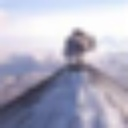

In [11]:
test_img, _ = test_data[0]
test_img = (test_img.numpy().transpose(1, 2, 0) * 255).astype(np.uint8)
cv2.imwrite("test_cifar100.jpg", cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR))

results = model("test_cifar100.jpg")

from IPython.display import display
from PIL import Image

img = Image.open("test_cifar100.jpg")
display(img)


In [12]:
import matplotlib.pyplot as plt

# Load the detected image
test_image_path = "test_cifar100.jpg"
test_img = cv2.imread(test_image_path, cv2.IMREAD_UNCHANGED)

# Plot the detected image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))  # Convert OpenCV BGR to RGB
plt.title("YOLO Detection Result on CIFAR-100")
plt.axis("off")
plt.show()


<Figure size 600x600 with 1 Axes>